<center> <h1 style="background-color:orange; color:white"><br>Diwali Sales Analysis<br></h1></center>

## `Objective of the Project :`

To create a informative report to track and analyse sales during diwali festival so that the owner can understand their customers and grow more sales
in upcoming years.

## `Importing the necessary libraries`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## `Load the dataset into dataframe`

To avoid encoding error : We use unicode escape

In [2]:
Diwali=pd.read_csv(r"C:\Users\Admin\Downloads\Python\Data Sets\Diwali Sales Data.csv",encoding='unicode escape')
Diwali

,User_ID,name,Product_ID,Gender,Age Group,Age,Marital_Status,M/U,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Married,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Married,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Unmarried,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Unmarried,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Unmarried,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [3]:
Diwali.shape

(11251, 16)

In [4]:
Diwali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   name              11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   M/U               11251 non-null  object 
 8   State             11251 non-null  object 
 9   Zone              11251 non-null  object 
 10  Occupation        11251 non-null  object 
 11  Product_Category  11251 non-null  object 
 12  Orders            11251 non-null  int64  
 13  Amount            11239 non-null  float64
 14  Status            0 non-null      float64
 15  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(9)
memor

## `Data Cleaning :`

## `Dropping irrevalent columns`



If we consider all columns present in the dataset then unneccessary columns will impact on the model's accuracy.<br>
Not all the columns are important to us in the given dataframe, and hence we would drop the columns that are irrevalent to us.<br> 
It would reflect our model's accucary so we need to drop them. Otherwise it will affect our model.<br>

Columns to be Dropped : Status , unnamed1 and Marital_Status

These columns are not neccessary to obtain the model's accucary. It does not contain any relevant information in the dataset. 

In [5]:
Diwali.drop(['Status','unnamed1','Marital_Status'],axis=1,inplace=True)

In [6]:
Diwali

,User_ID,name,Product_ID,Gender,Age Group,Age,M/U,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,Unmarried,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,Unmarried,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,Unmarried,Karnataka,Southern,Agriculture,Office,3,206.0


## `Dropping the null or missing values`

Missing values are usually represented in the form of Nan or null or None in the dataset.<br>
Finding whether we have null values in the data is by using the isnull() function.<br>
There are many values which are missing, in pandas dataframe these values are reffered to as np.nan.<br> 
We want to deal with these values beause we can't use nan values to train models.<br> 
Either we can remove them to apply some strategy to replace them with other values.<br>
To keep things simple we will be dropping nan values

In [7]:
Diwali.isnull().sum()

User_ID              0
name                 0
Product_ID           0
Gender               0
Age Group            0
Age                  0
M/U                  0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

It is clearly Visible that we have 12 Null Values in Amount Column

In [8]:
Diwali.dropna(inplace=True)

In [9]:
Diwali.isnull().sum()

User_ID             0
name                0
Product_ID          0
Gender              0
Age Group           0
Age                 0
M/U                 0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

All Null Values are removed Successfully

## `Checking Data Type`

In [10]:
Diwali.dtypes

User_ID               int64
name                 object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
M/U                  object
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

Now we have to change the Data Type of Amount Column from float to int

In [11]:
Diwali['Amount']=Diwali['Amount'].astype('int')

In [12]:
Diwali.dtypes

User_ID              int64
name                object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
M/U                 object
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

## `Renaming the columns`

Now, Its time for renaming the feature to useful feature name. It will help to use them in model training purpose.<br>

We have already dropped the unneccesary columns, and now we are left with useful columns.<br> 

One extra thing that we would do is to rename the columns such that the name clearly represents the essence of the column.

Name of the Columns to be Changed - 'name' to 'Customer_Name' and 'M/U' to 'Relationship_Status'

In [13]:
Diwali.rename(columns={'name':'Customer_Name','M/U':'Relationship_Status'},inplace=True)

In [14]:
Diwali

,User_ID,Customer_Name,Product_ID,Gender,Age Group,Age,Relationship_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,Unmarried,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,Unmarried,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,Unmarried,Karnataka,Southern,Agriculture,Office,3,206


## `Data Cleaning is Complete`

Before Data Cleaning we have 11251 Rows and 16 Columns.<br>
After Data Cleaning we have 11239 Rows and 13 Columns

<center> <h1 style="background-color:orange; color:white"><br>Exploratory Data Analysis<br></h1></center>

## `Gender :`

## `Male Vs Female`

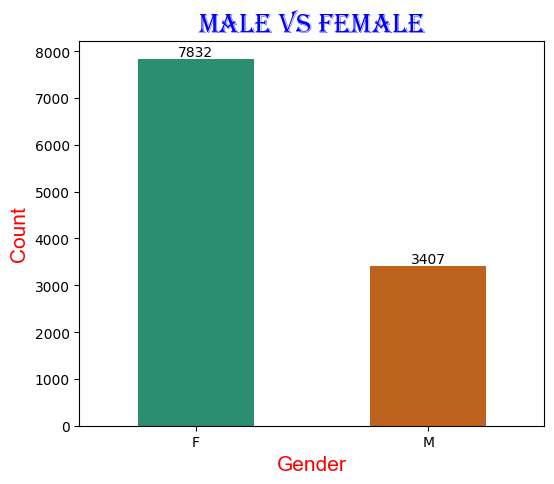

In [15]:
plt.figure(figsize=(6,5))
Male_Vs_Female=sns.countplot(x='Gender',data=Diwali,hue='Gender',legend=False,palette='Dark2',width=0.5)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Male Vs Female',fontdict=Font_Title)
plt.xlabel('Gender',fontdict=Font_Label)
plt.ylabel('Count',fontdict=Font_Label)
for i in Male_Vs_Female.containers:
    Male_Vs_Female.bar_label(i)
Male_Vs_Female
plt.show()

## `Insight :`

From the Above Graph we can see that most of the buyers are Female.

## `Gender Vs Amount`

In [16]:
Gender_Vs_Amount=Diwali.groupby('Gender')[['Amount']].sum().sort_values(by='Amount',ascending=False)

In [17]:
Gender_Vs_Amount

,Amount
Gender,
F,74335853
M,31913276


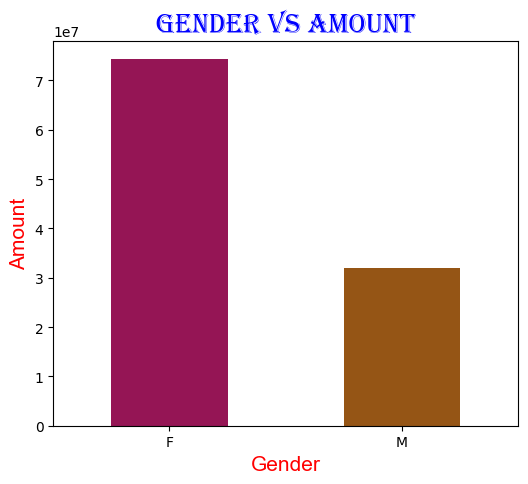

In [18]:
plt.figure(figsize=(6,5))
sns.barplot(x='Gender',y='Amount',data=Gender_Vs_Amount,hue='Gender',legend=False,palette='brg',width=0.5)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Gender Vs Amount',fontdict=Font_Title)
plt.xlabel('Gender',fontdict=Font_Label)
plt.ylabel('Amount',fontdict=Font_Label)
plt.show()

## `Insight :`

From the Above Graph we can see that the Purchasing Power of the Females are greater than Men.

## `Age :`

## `Age Group`

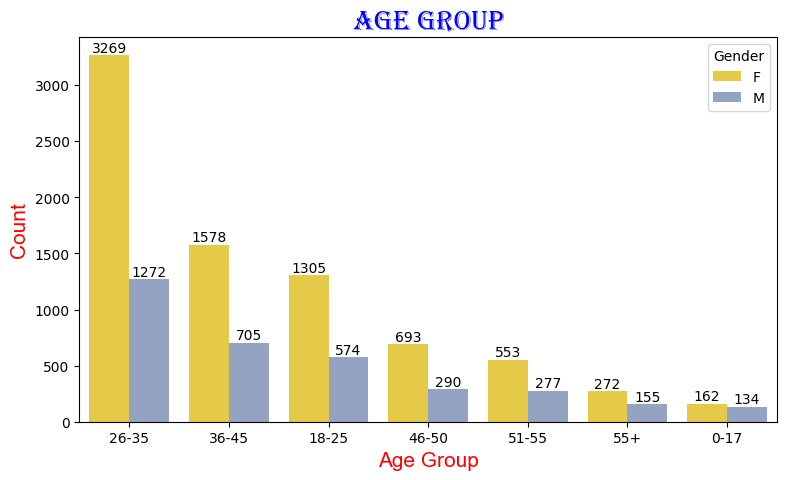

In [19]:
plt.figure(figsize=(9,5))
Age_Group=sns.countplot(x='Age Group',data=Diwali,hue='Gender',palette='Set2_r',order=Diwali['Age Group'].value_counts().index)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Age Group',fontdict=Font_Title)
plt.xlabel('Age Group',fontdict=Font_Label)
plt.ylabel('Count',fontdict=Font_Label)
for i in Age_Group.containers:
    Age_Group.bar_label(i)
plt.show()

## `Insight :`

From the Above Graph we can see that most of the Buyers are from Age Group (26-35) and they are Females.

## `Total Amount Vs Age Group`

In [20]:
Total_Amount_Vs_Age_Group=Diwali.groupby('Age Group')[['Amount']].sum().sort_values(by='Amount',ascending=False)

In [21]:
Total_Amount_Vs_Age_Group

,Amount
Age Group,
26-35,42613442
36-45,22144994
18-25,17240732
46-50,9207844
51-55,8261477
55+,4080987
0-17,2699653


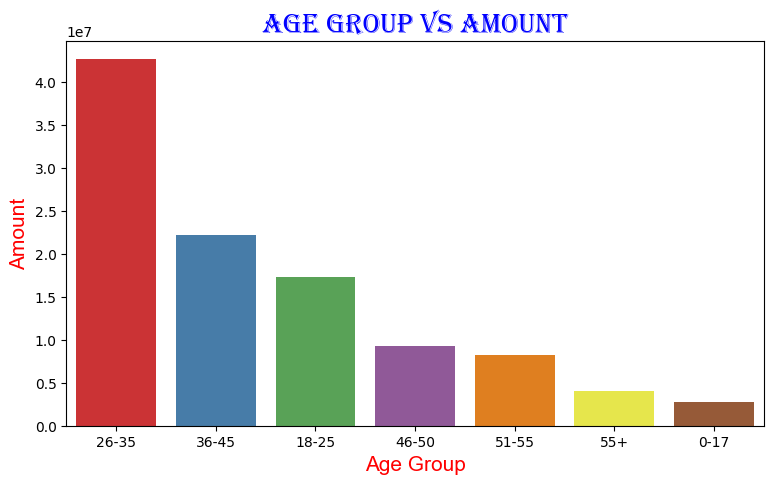

In [22]:
plt.figure(figsize=(9,5))
sns.barplot(x='Age Group',y='Amount',data=Total_Amount_Vs_Age_Group,hue='Age Group',legend=False,palette='Set1')
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Age Group Vs Amount',fontdict=Font_Title)
plt.xlabel('Age Group',fontdict=Font_Label)
plt.ylabel('Amount',fontdict=Font_Label)
plt.show()

## `Insight :`

From the Above Graph we can see that the Purchasing Power of Age Group (26-35) is highest from all the other Age Groups.

## `State :`

## `Top 10 States By Orders`

In [23]:
Top_10_State_Orders=Diwali.groupby('State')[['Orders']].sum().sort_values(by='Orders',ascending=False).head(10)

In [24]:
Top_10_State_Orders

,Orders
State,
Uttar Pradesh,4807
Maharashtra,3810
Karnataka,3240
Delhi,2740
Madhya Pradesh,2252
Andhra Pradesh,2051
Himachal Pradesh,1568
Kerala,1137
Haryana,1109


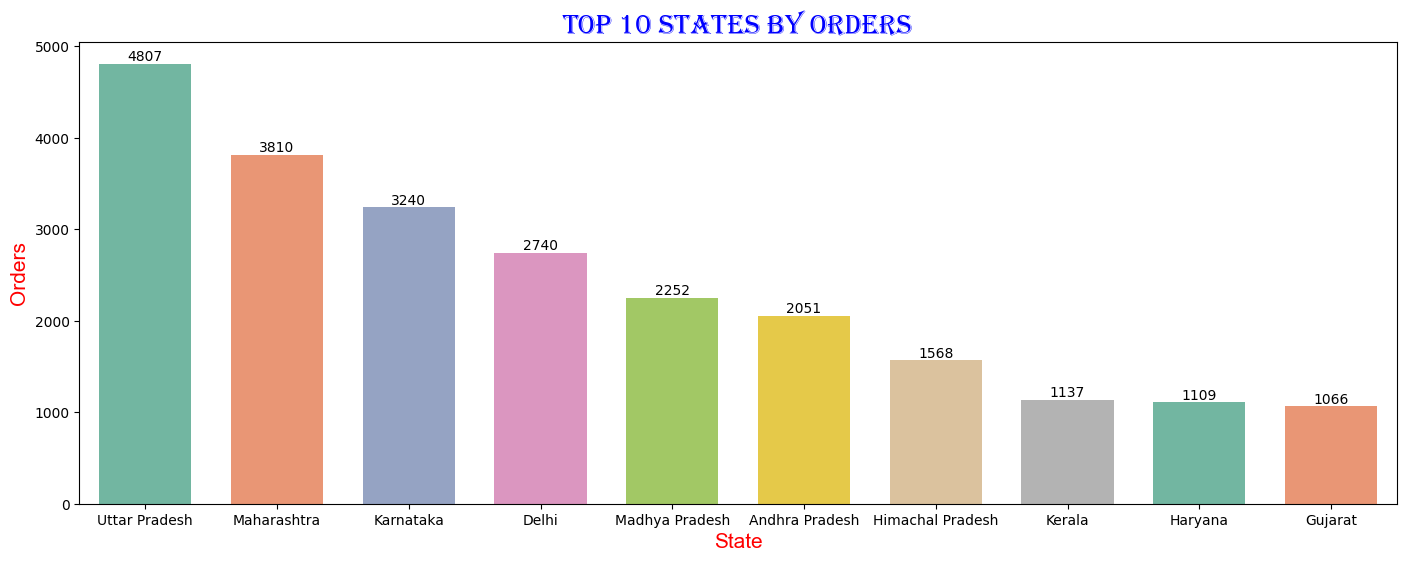

In [25]:
plt.figure(figsize=(17,6))
Top_10_Orders=sns.barplot(x='State',y='Orders',data=Top_10_State_Orders,hue='State',legend=False,palette='Set2',width=0.7)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Top 10 States By Orders',fontdict=Font_Title)
plt.xlabel('State',fontdict=Font_Label)
plt.ylabel('Orders',fontdict=Font_Label)
for i in Top_10_Orders.containers:
    Top_10_Orders.bar_label(i)
plt.show()

## `Insight :`

From the Above Graph we can see that most of the Orders are from Uttar Pradesh , Maharashtara and Karnataka. (Top 3)

From the Above Graph we can see that least of the Orders are from Kerala , Haryana and Gujarat. (Bottom 3)

## `Top 10 States By Amount`

In [26]:
Top_10_State_Amount=Diwali.groupby('State')[['Amount']].sum().sort_values(by='Amount',ascending=False).head(10)

In [27]:
Top_10_State_Amount

,Amount
State,
Uttar Pradesh,19374968
Maharashtra,14427543
Karnataka,13523540
Delhi,11603818
Madhya Pradesh,8101142
Andhra Pradesh,8037146
Himachal Pradesh,4963368
Haryana,4220175
Bihar,4022757


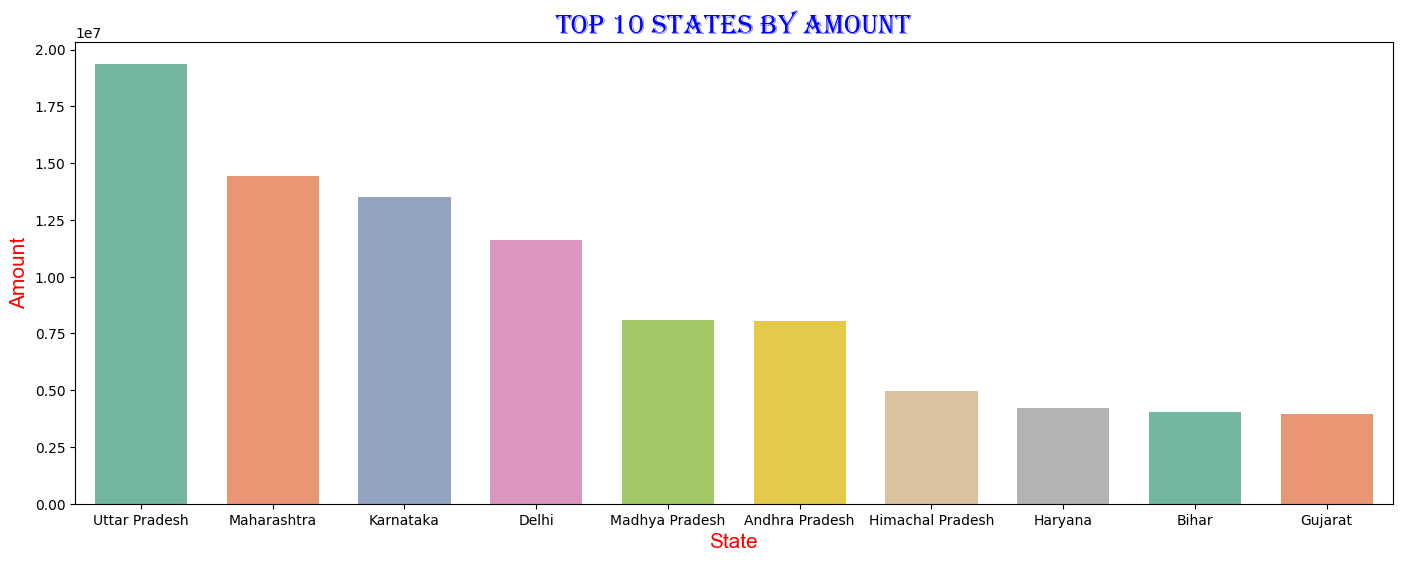

In [28]:
plt.figure(figsize=(17,6))
sns.barplot(x='State',y='Amount',data=Top_10_State_Amount,hue='State',legend=False,palette='Set2',width=0.7)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Top 10 States By Amount',fontdict=Font_Title)
plt.xlabel('State',fontdict=Font_Label)
plt.ylabel('Amount',fontdict=Font_Label)
plt.show()

## `Insight :`

From the Above Graph we can see that :

Top 3 Sates By Amount = Uttar Pradesh , Maharashtara and Karnataka.( Same in the Case of Orders)

But Bottom 3 Sates By Amount = Haryana , Bihar and Gujarat.

## `Note :`

As we know that In case of Orders Kerala is in Bottom 3 but in case of Amount Bihar replaces Kerala.

It simply Means that the Quantity of Orders of Kerala is more than Bihar.  But Purchasing Power of Bihar is greater than Kerala even Bihar has less Order Quantity as compared to Kerala.

## `Relationship Status :`

## `Married Vs Unmarried`

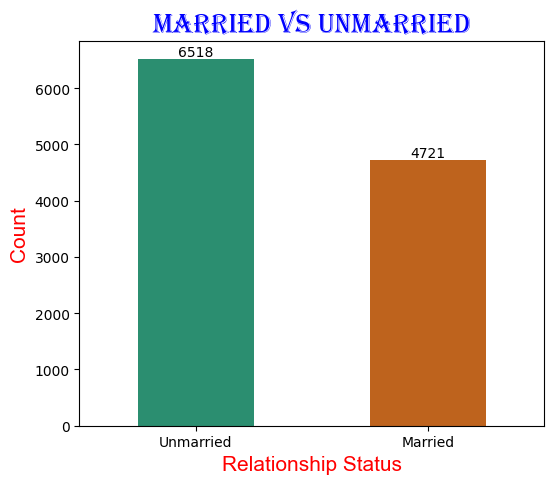

In [29]:
plt.figure(figsize=(6,5))
Married_Vs_Unmarried=sns.countplot(x='Relationship_Status',data=Diwali,hue='Relationship_Status',legend=False,palette='Dark2',width=0.5)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Married Vs Unmarried',fontdict=Font_Title)
plt.xlabel('Relationship Status',fontdict=Font_Label)
plt.ylabel('Count',fontdict=Font_Label)
for i in Married_Vs_Unmarried.containers:
    Married_Vs_Unmarried.bar_label(i)
plt.show()

## `Insight :`

From the Above Graph we can see that most of the Buyers are Unmarried.

## `Relationship Status Vs Amount`

In [30]:
Relationship_Status_Vs_Amount=Diwali.groupby(['Relationship_Status','Gender'])[['Amount']].sum().sort_values(by='Amount',ascending=False)

In [31]:
Relationship_Status_Vs_Amount

,,Amount
Relationship_Status,Gender,
Unmarried,F,43786646
Married,F,30549207
Unmarried,M,18338738
Married,M,13574538


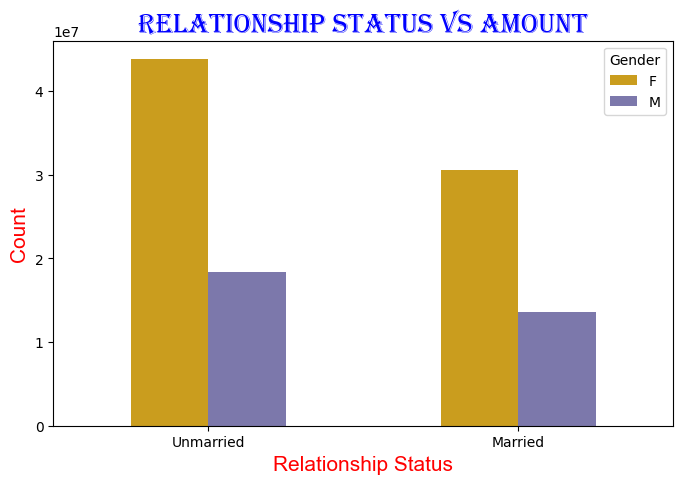

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x='Relationship_Status',y='Amount',data=Relationship_Status_Vs_Amount,hue='Gender',palette='Dark2_r',width=0.5)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Relationship Status Vs Amount',fontdict=Font_Title)
plt.xlabel('Relationship Status',fontdict=Font_Label)
plt.ylabel('Count',fontdict=Font_Label)
plt.show()

## `Insight :`

From the Above Graph we can see that most of the Buyers are Unmarried Female also the Purchasing Power of Unmarried Female is greater than all other Status.

## `Occupation :`

## `No. of Buyers By Occupation`

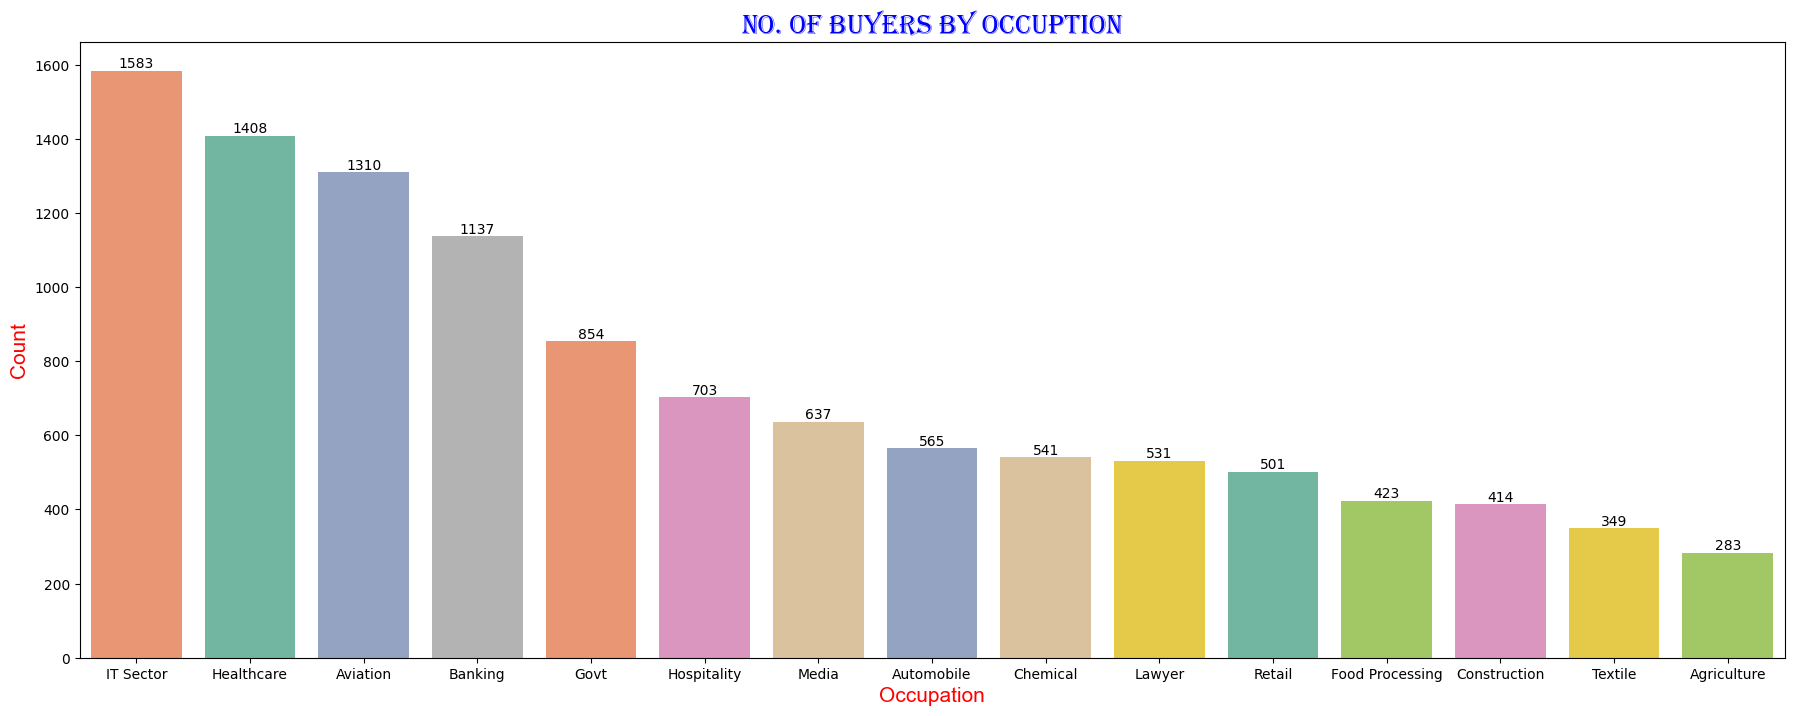

In [33]:
plt.figure(figsize=(22,8))
Occupation=sns.countplot(x='Occupation',data=Diwali,hue='Occupation',legend=False,palette='Set2',order=Diwali['Occupation'].value_counts().index)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('No. of Buyers by Occuption',fontdict=Font_Title)
plt.xlabel('Occupation',fontdict=Font_Label)
plt.ylabel('Count',fontdict=Font_Label)
for i in Occupation.containers:
    Occupation.bar_label(i)
plt.show()


## `Insight :`

From the Above Graph we can see that most of the Buyers are working in IT , HealthCare and Aviation Sector.

## `Occupation Vs Amount`

In [34]:
Occupation_Vs_Amount=Diwali.groupby('Occupation')[['Amount']].sum().sort_values(by='Amount',ascending=False)

In [35]:
Occupation_Vs_Amount

,Amount
Occupation,
IT Sector,14755079
Healthcare,13034586
Aviation,12602298
Banking,10770610
Govt,8517212
Hospitality,6376405
Media,6295832
Automobile,5368596
Chemical,5297436


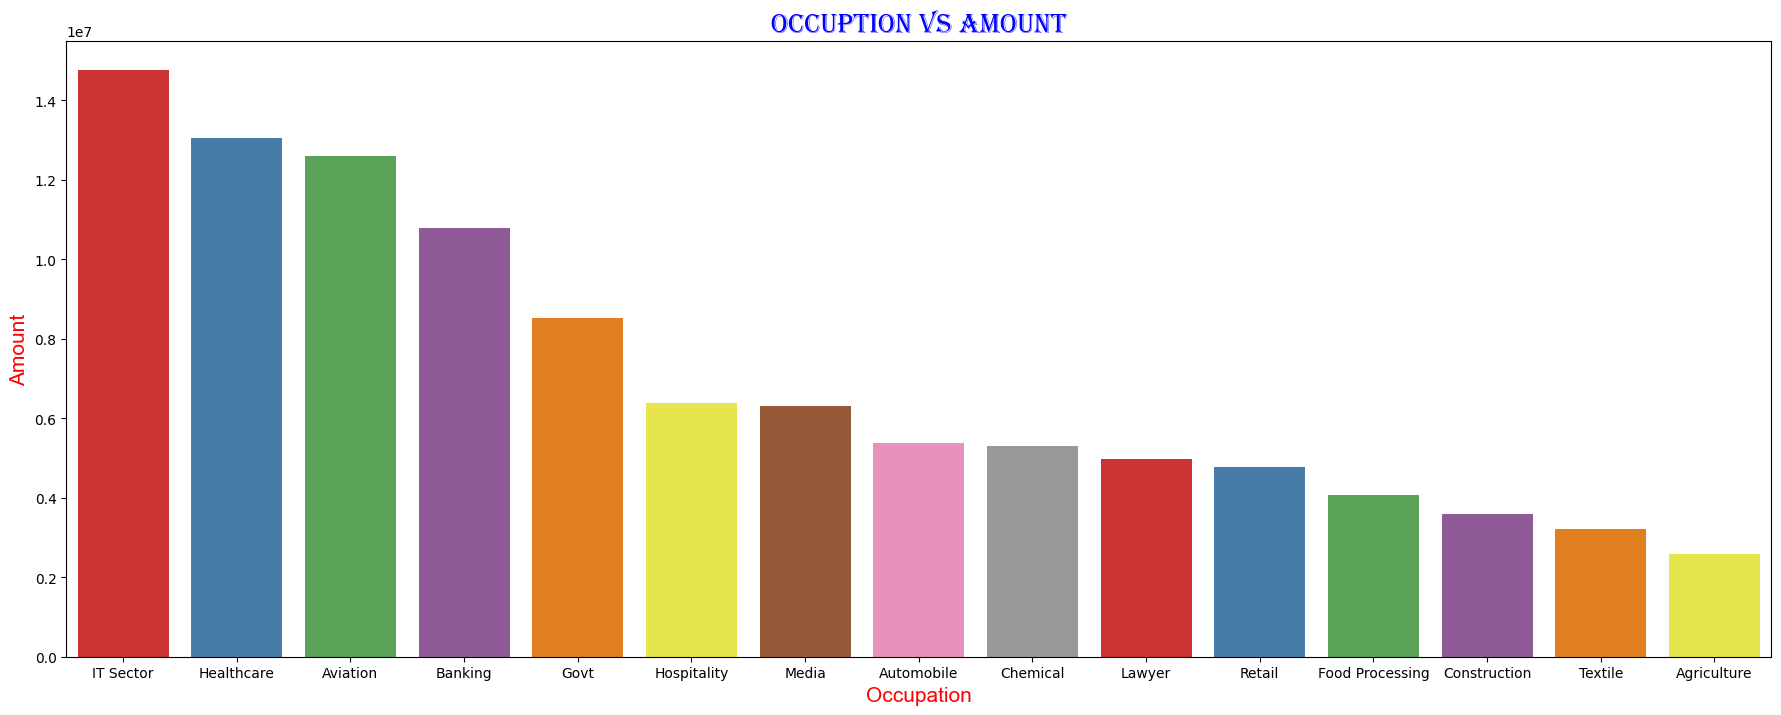

In [36]:
plt.figure(figsize=(22,8))
sns.barplot(x='Occupation',y='Amount',data=Occupation_Vs_Amount,hue='Occupation',legend=False,palette='Set1')
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Occuption Vs Amount',fontdict=Font_Title)
plt.xlabel('Occupation',fontdict=Font_Label)
plt.ylabel('Amount',fontdict=Font_Label)
plt.show()

## `Insight :`

From the Above Graph we can see that the people's who are working in IT , HealthCare and Aviation Sector have highest Purchasing Power as compared to other Sectors.

## `Product Category :`

## `No. of Buyers By Product Category`

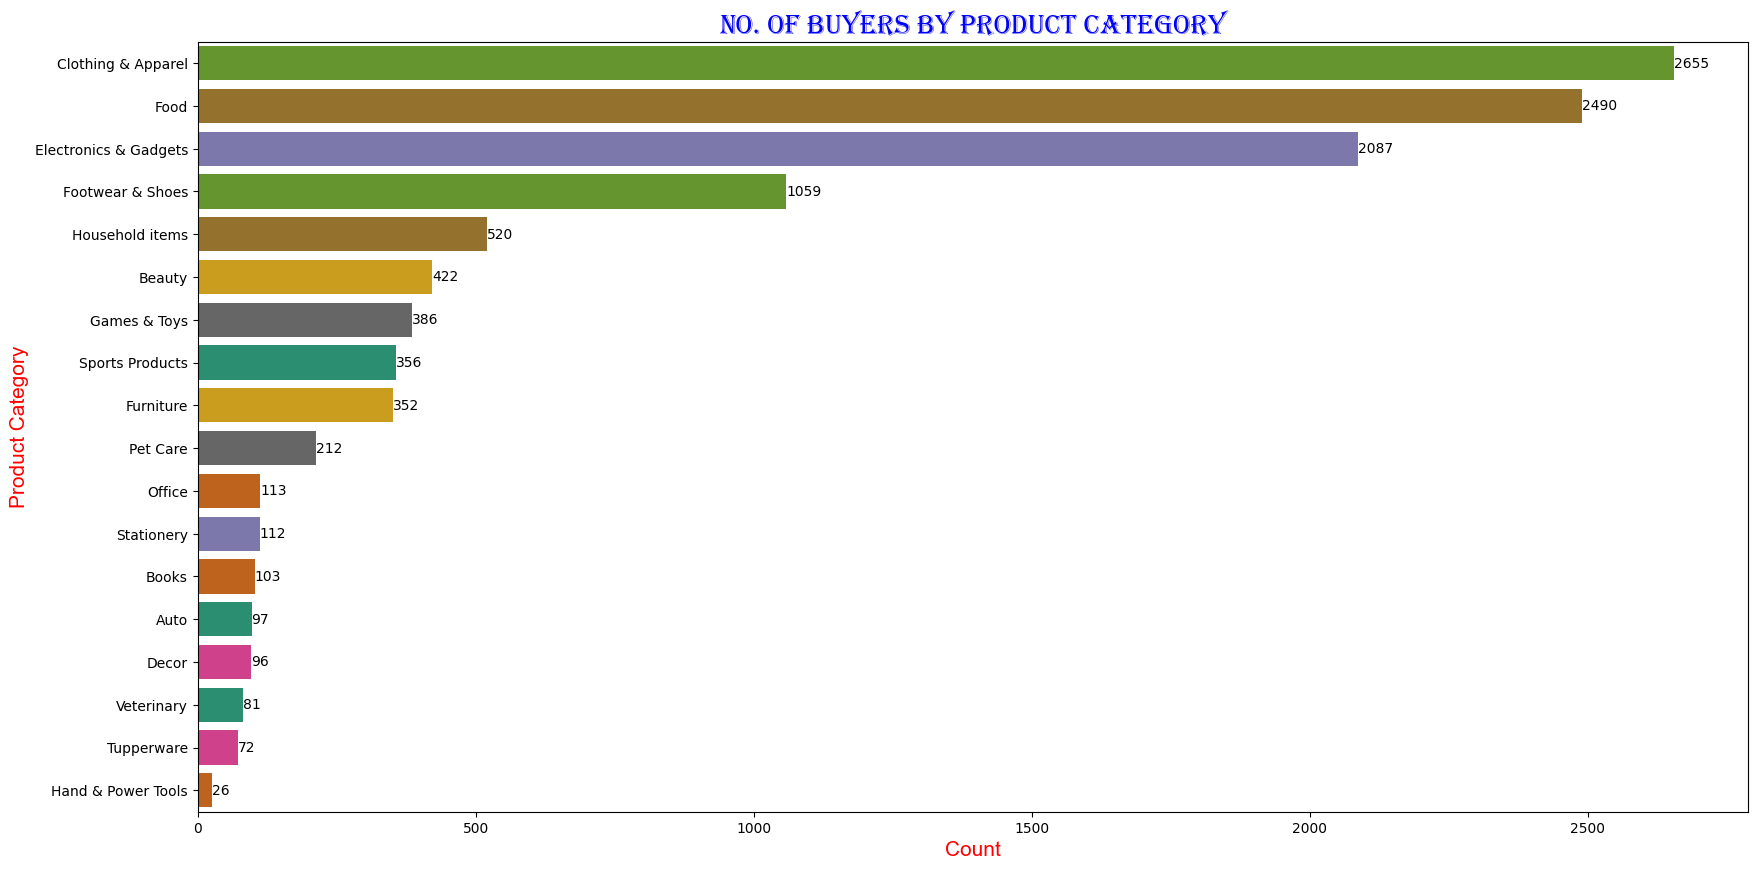

In [37]:
plt.figure(figsize=(20,10))
Product_Category=sns.countplot(y='Product_Category',data=Diwali,hue='Product_Category',legend=False,palette='Dark2',order=Diwali['Product_Category'].value_counts().index)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('No. of Buyers by Product Category',fontdict=Font_Title)
plt.xlabel('Count',fontdict=Font_Label)
plt.ylabel('Product Category',fontdict=Font_Label)
for i in Product_Category.containers:
    Product_Category.bar_label(i)
plt.show()

## `Insight :`

From the Above Graph we can see that Clothing , Food and Electronics are the most selling Product Categories.

## `Product Category Vs Amount`

In [38]:
Product_Category_Vs_Amount=Diwali.groupby('Product_Category')[['Amount']].sum().sort_values(by='Amount',ascending=False)

In [39]:
Product_Category_Vs_Amount

,Amount
Product_Category,
Food,33933883
Clothing & Apparel,16495019
Electronics & Gadgets,15643846
Footwear & Shoes,15575209
Furniture,5440051
Games & Toys,4331694
Sports Products,3635933
Beauty,1959484
Auto,1958609


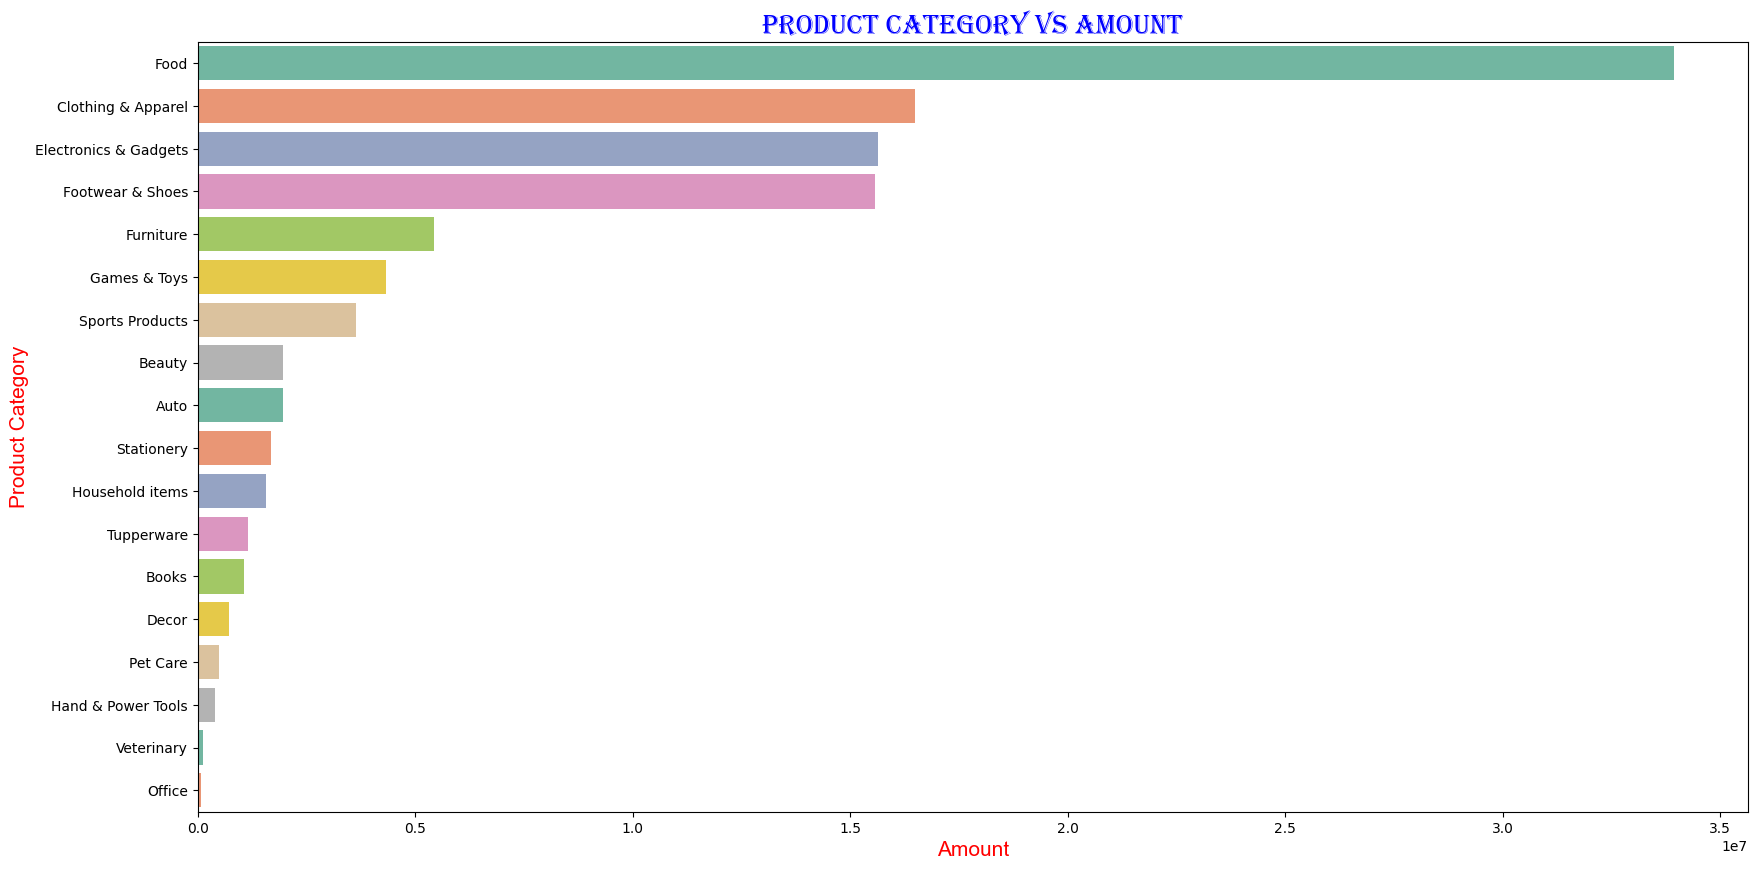

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(y='Product_Category',x='Amount',data=Product_Category_Vs_Amount,hue='Product_Category',legend=False,palette='Set2')
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Product Category Vs Amount',fontdict=Font_Title)
plt.xlabel('Amount',fontdict=Font_Label)
plt.ylabel('Product Category',fontdict=Font_Label)
plt.show()

## `Insight :`

From the Above Graph we can see that Food has the highest Purchasing Power even the No. of Buyers of Food are less than Clothing.

## `Top 10 Sold Products`

In [41]:
Top_10_Products=Diwali.groupby('Product_ID')[['Orders']].sum().sort_values(by='Orders',ascending=False).head(10)

In [42]:
Top_10_Products

,Orders
Product_ID,
P00265242,127
P00110942,116
P00237542,91
P00184942,82
P00114942,79
P00025442,79
P00117942,76
P00145042,76
P00044442,75


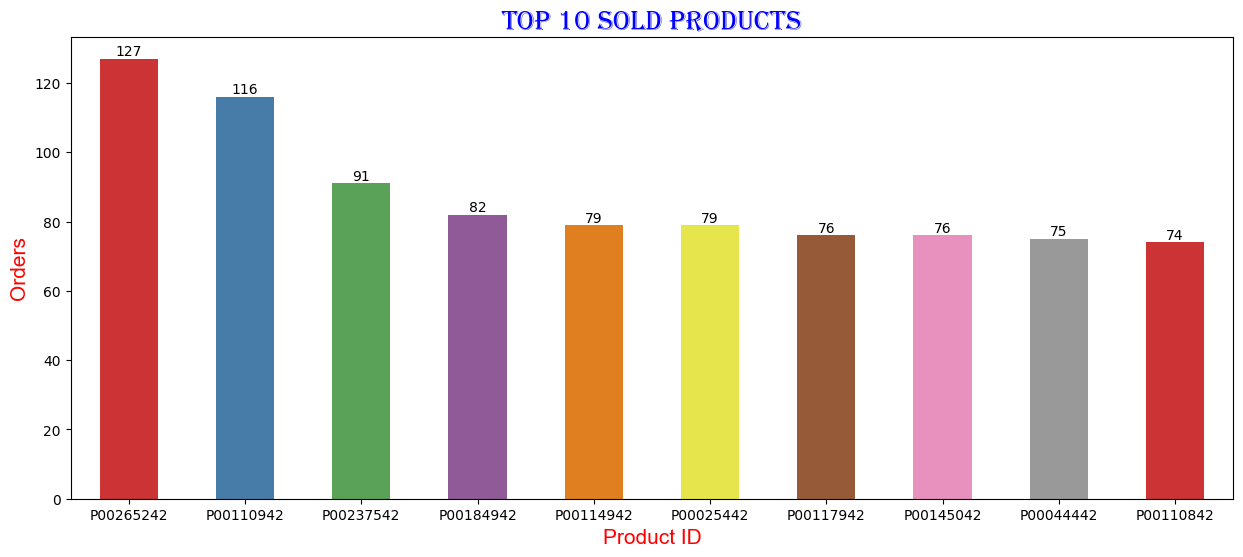

In [43]:
plt.figure(figsize=(15,6))
Top_10_Sold_Products=sns.barplot(x='Product_ID',y='Orders',data=Top_10_Products,hue='Product_ID',legend=False,palette='Set1',width=0.5)
Font_Title={'font':'Algerian','color':'blue','size':20}
Font_Label={'font':'Arial','color':'Red','size':15}
plt.title('Top 10 Sold Products',fontdict=Font_Title)
plt.xlabel('Product ID',fontdict=Font_Label)
plt.ylabel('Orders',fontdict=Font_Label)
for i in Top_10_Sold_Products.containers:
    Top_10_Sold_Products.bar_label(i)
plt.show()

## `Insight :`

From the Above Graph we can see that Product ID - P00265242 has maximum number of Orders. Hence,it is the maximum sold Product.

## `Conclusion :`

## `Unmarried Females of Age Group (26-35) yrs belonging from UP,Maharashtra and Karnataka who are working in IT,HealthCare and Aviation Sector are more likely to buy products from food,Clothing and Electronics Category.`